# Decision Tree Implementation


In [1]:
import os
import numpy as np
import pandas as pd
import torch
import torchvision
from torchvision import datasets, transforms
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

data_dir = r"D:\VinUni materials\Third Year\Fall Semester 2022\COMP3020 - Machine Learning\Project\GUI application\Official_Data"


In [2]:
transformer = transforms.Compose(
    [
        transforms.Resize((144, 144)),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomVerticalFlip(p=0.5),
        transforms.RandomRotation(10),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.2, 0.2, 0.2]),
    ]
)


In [3]:
train_dataset = datasets.ImageFolder(os.path.join(data_dir, 'train'), transform=transformer)
test_dataset = datasets.ImageFolder(os.path.join(data_dir, 'test'), transform=transformer)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=16, shuffle=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


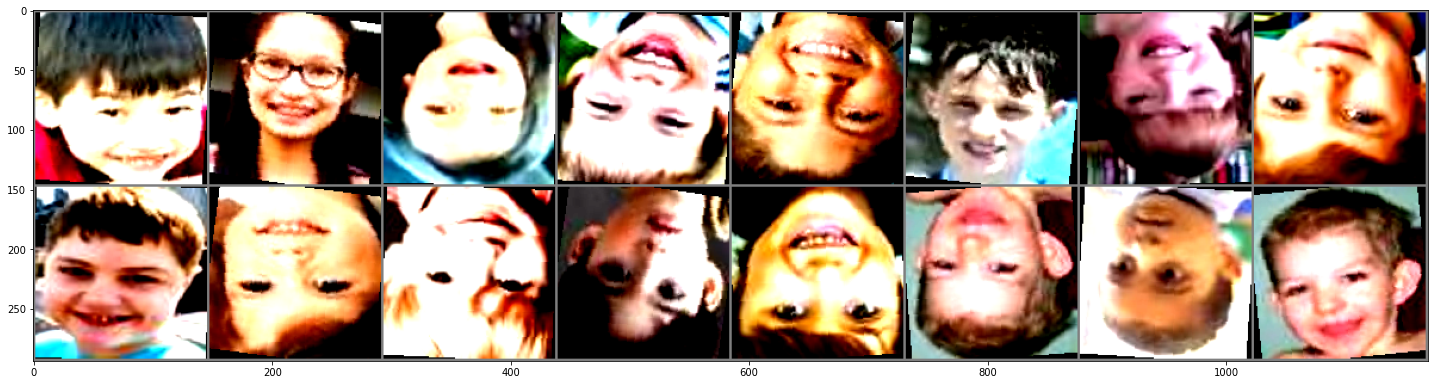

autistic autistic autistic non_autistic non_autistic autistic autistic non_autistic autistic non_autistic non_autistic non_autistic non_autistic autistic autistic autistic


In [4]:
from PIL import Image
import torchvision

batch_size = 16
classes = ('autistic', 'non_autistic')
#Showing {batch_size} random images from a single random batch in a grid format
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    fig, ax = plt.subplots(figsize=(25, 25))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))


In [5]:
X_train, y_train = [], []
for images, labels in train_loader:
    images = images.numpy().reshape(-1, 144 * 144 * 3)
    X_train.append(images)
    y_train.append(labels)

X_train = np.concatenate(X_train)
y_train = np.concatenate(y_train)

X_test, y_test = [], []
for images, labels in test_loader:
    images = images.numpy().reshape(-1, 144 * 144 * 3)
    X_test.append(images)
    y_test.append(labels)

X_test = np.concatenate(X_test)
y_test = np.concatenate(y_test)

In [8]:
print(len(X_test))
print(len(X_train))


202
2738
[-2.5 -2.5 -2.5 ... -2.5 -2.5 -2.5]


### Default DT classifier

In [22]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

train_acc = clf.score(X_train, y_train)
val_acc = clf.score(X_val, y_val)
test_acc = clf.score(X_test, y_test)

print("Train Accuracy: ", train_acc)
print("Validation Accuracy: ", val_acc)
print("Test Accuracy: ", test_acc)

Train Accuracy:  1.0
Validation Accuracy:  0.5961070559610706
Test Accuracy:  0.6831683168316832


### After performing hyperparameter tuning

In [35]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1)

clf = DecisionTreeClassifier(max_depth = 9)
clf.fit(X_train, y_train)

train_acc = clf.score(X_train, y_train)
val_acc = clf.score(X_val, y_val)
test_acc = clf.score(X_test, y_test)

print("Train Accuracy: ", train_acc)
print("Validation Accuracy: ", val_acc)
print("Test Accuracy: ", test_acc)

Train Accuracy:  0.9329608938547486
Validation Accuracy:  0.6228710462287105
Test Accuracy:  0.7475247524752475


In [19]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

y_pred = clf.predict(X_test)
print(accuracy_score(y_pred, y_test))

0.7475247524752475


In [20]:
classes = ['autistic', 'non_autistic']
print(classification_report(y_test, y_pred, target_names= classes))

              precision    recall  f1-score   support

    autistic       0.82      0.63      0.72       101
non_autistic       0.70      0.86      0.77       101

    accuracy                           0.75       202
   macro avg       0.76      0.75      0.74       202
weighted avg       0.76      0.75      0.74       202



### Grid Search CV


In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import multiprocessing
import numpy as np

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1)

# X_train1 = X_train[:600]
# y_train1 = y_train[:600]



# Use parallel processing to speed up the training process
num_cores = multiprocessing.cpu_count()

# Set n_jobs to half the number of CPUs
n_jobs = int(num_cores / 2)

# Define the parameter grid to search
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": np.arange(1, 30),
    "min_samples_split": np.arange(2, 20),
    "min_samples_leaf": np.arange(1, 20),
    "max_leaf_nodes": np.arange(2, 100),
    "min_impurity_decrease": np.arange(0.0, 0.5, 0.05),
    "min_weight_fraction_leaf": np.arange(0.0, 0.5, 0.05)
}

# Create the decision tree classifier
dt = DecisionTreeClassifier()

# Create the grid search object
grid_search = GridSearchCV(dt, param_grid, cv=5, n_jobs = n_jobs)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and accuracy score
print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

#### Save model to disk

In [12]:
import pickle
pickle.dump(clf, open('dt_model.p','wb'))
print("Pickle is dumped successfully")

Pickle is dumped successfully


#### Autism prediction

Enter URL of Image: D:\VinUni materials\Third Year\Fall Semester 2022\COMP3020 - Machine Learning\Project\GUI application\Official_Data\test\autistic\1407.jpg


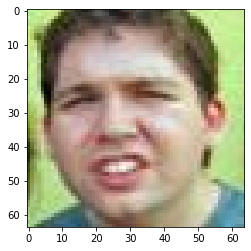

The predicted image is : non_autistic
The actual image is : autistic
Continue? (y/n)y

Enter URL of Image: D:\VinUni materials\Third Year\Fall Semester 2022\COMP3020 - Machine Learning\Project\GUI application\Official_Data\test\autistic\1391.jpg


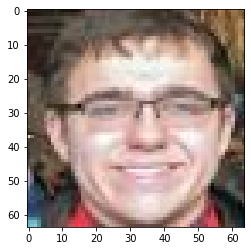

The predicted image is : non_autistic
The actual image is : autistic
Continue? (y/n)y

Enter URL of Image: D:\VinUni materials\Third Year\Fall Semester 2022\COMP3020 - Machine Learning\Project\GUI application\Official_Data\test\autistic\1421.jpg


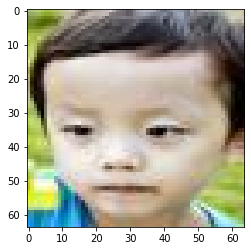

The predicted image is : autistic
The actual image is : autistic
Continue? (y/n)y

Enter URL of Image: D:\VinUni materials\Third Year\Fall Semester 2022\COMP3020 - Machine Learning\Project\GUI application\Official_Data\test\non_autistic\1398.jpg


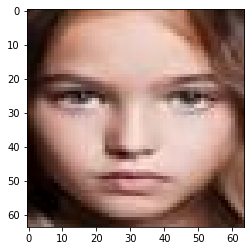

The predicted image is : autistic
The actual image is : non_autistic
Continue? (y/n)y

Enter URL of Image: D:\VinUni materials\Third Year\Fall Semester 2022\COMP3020 - Machine Learning\Project\GUI application\Official_Data\test\non_autistic\1378.jpg


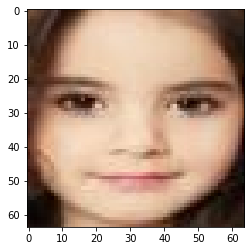

The predicted image is : non_autistic
The actual image is : non_autistic
Continue? (y/n)n
Thank you for testing the model!


In [13]:
clf = pickle.load(open('dt_model.p','rb'))
actual_image = ''
while True:
    url=input('Enter URL of Image: ')
    if 'non_autistic' in url:
        actual_image = 'non_autistic'
    else:
        actual_image = 'autistic'
        
    image = Image.open(url)
    imgplot = plt.imshow(image)
    plt.show()
    image = transformer(image)
    image = image.numpy().reshape(-1, 144 * 144 * 3)
    # image = image.float()
    # image = Variable(image, requires_grad=True)

    # l=[img_resize.flatten()]
    prediction = clf.predict(image)
    print("The predicted image is : "+ classes[prediction[0]])
    print("The actual image is : " + actual_image)
    continue_predict = input("Continue? (y/n)")
    if continue_predict.lower() == 'y':
        print()
    else: 
        print("Thank you for testing the model!")
        break